In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import multivariate_normal, norm


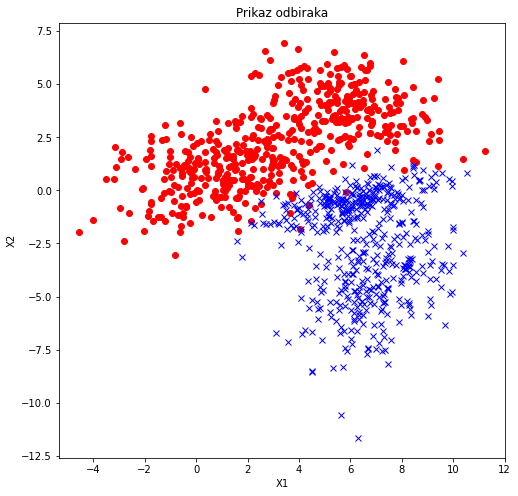

In [2]:
N = 500;
## raspodele su bimodalne

P11 = 0.6
P21 = 0.55

ind = np.random.rand(1,N)
ind = np.repeat(ind,2,axis = 0).T

M11 = np.array([1,1]).T 
M12 = np.array([6,4]).T 
M21 = np.array([7 ,-4]).T 
M22 = np.array([6, -0.5]).T

cov11 = np.array([[4, 1.1], [1.1, 2]])
cov12 = np.array([[3, -0.8], [-0.8, 1.5]])
cov21 = np.array([[2, 1.1], [1.1, 4]])
cov22 = np.array([[3, 0.8], [0.8, 0.5]])


#  
K11 = np.random.multivariate_normal(M11,cov11,N) * (ind < P11);
K12 = np.random.multivariate_normal(M12,cov12,N) * (ind > P11);

K1 = (K11 + K12).T;

K21 = np.random.multivariate_normal(M21,cov21,N) * (ind < P21)
K22 = np.random.multivariate_normal(M22,cov22,N) * (ind > P21)

K2 = (K21 + K22).T

fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro')
ax.plot(K2[0,:],K2[1,:],'bx')
ax.set(title = 'Prikaz odbiraka')
plt.show()


In [3]:
delta = 0.01;
x1 = np.arange(-6,13,delta);
x2 = np.arange(-10,6,delta);

mesh = np.meshgrid(x1,x2)
X= np.reshape(mesh,(2,-1)).T

#bimodalna funkcija raspodele 

pdf_flat = P11 * multivariate_normal.pdf(X,M11,cov11)  + (1-P11) * multivariate_normal.pdf(X,M12,cov12);
pdf2_flat = P21 * multivariate_normal.pdf(X,M21,cov21)  + (1-P21) * multivariate_normal.pdf(X,M22,cov22);

pdf = np.reshape(pdf_flat,(1600,-1))
pdf2 = np.reshape(pdf2_flat,(1600,-1))

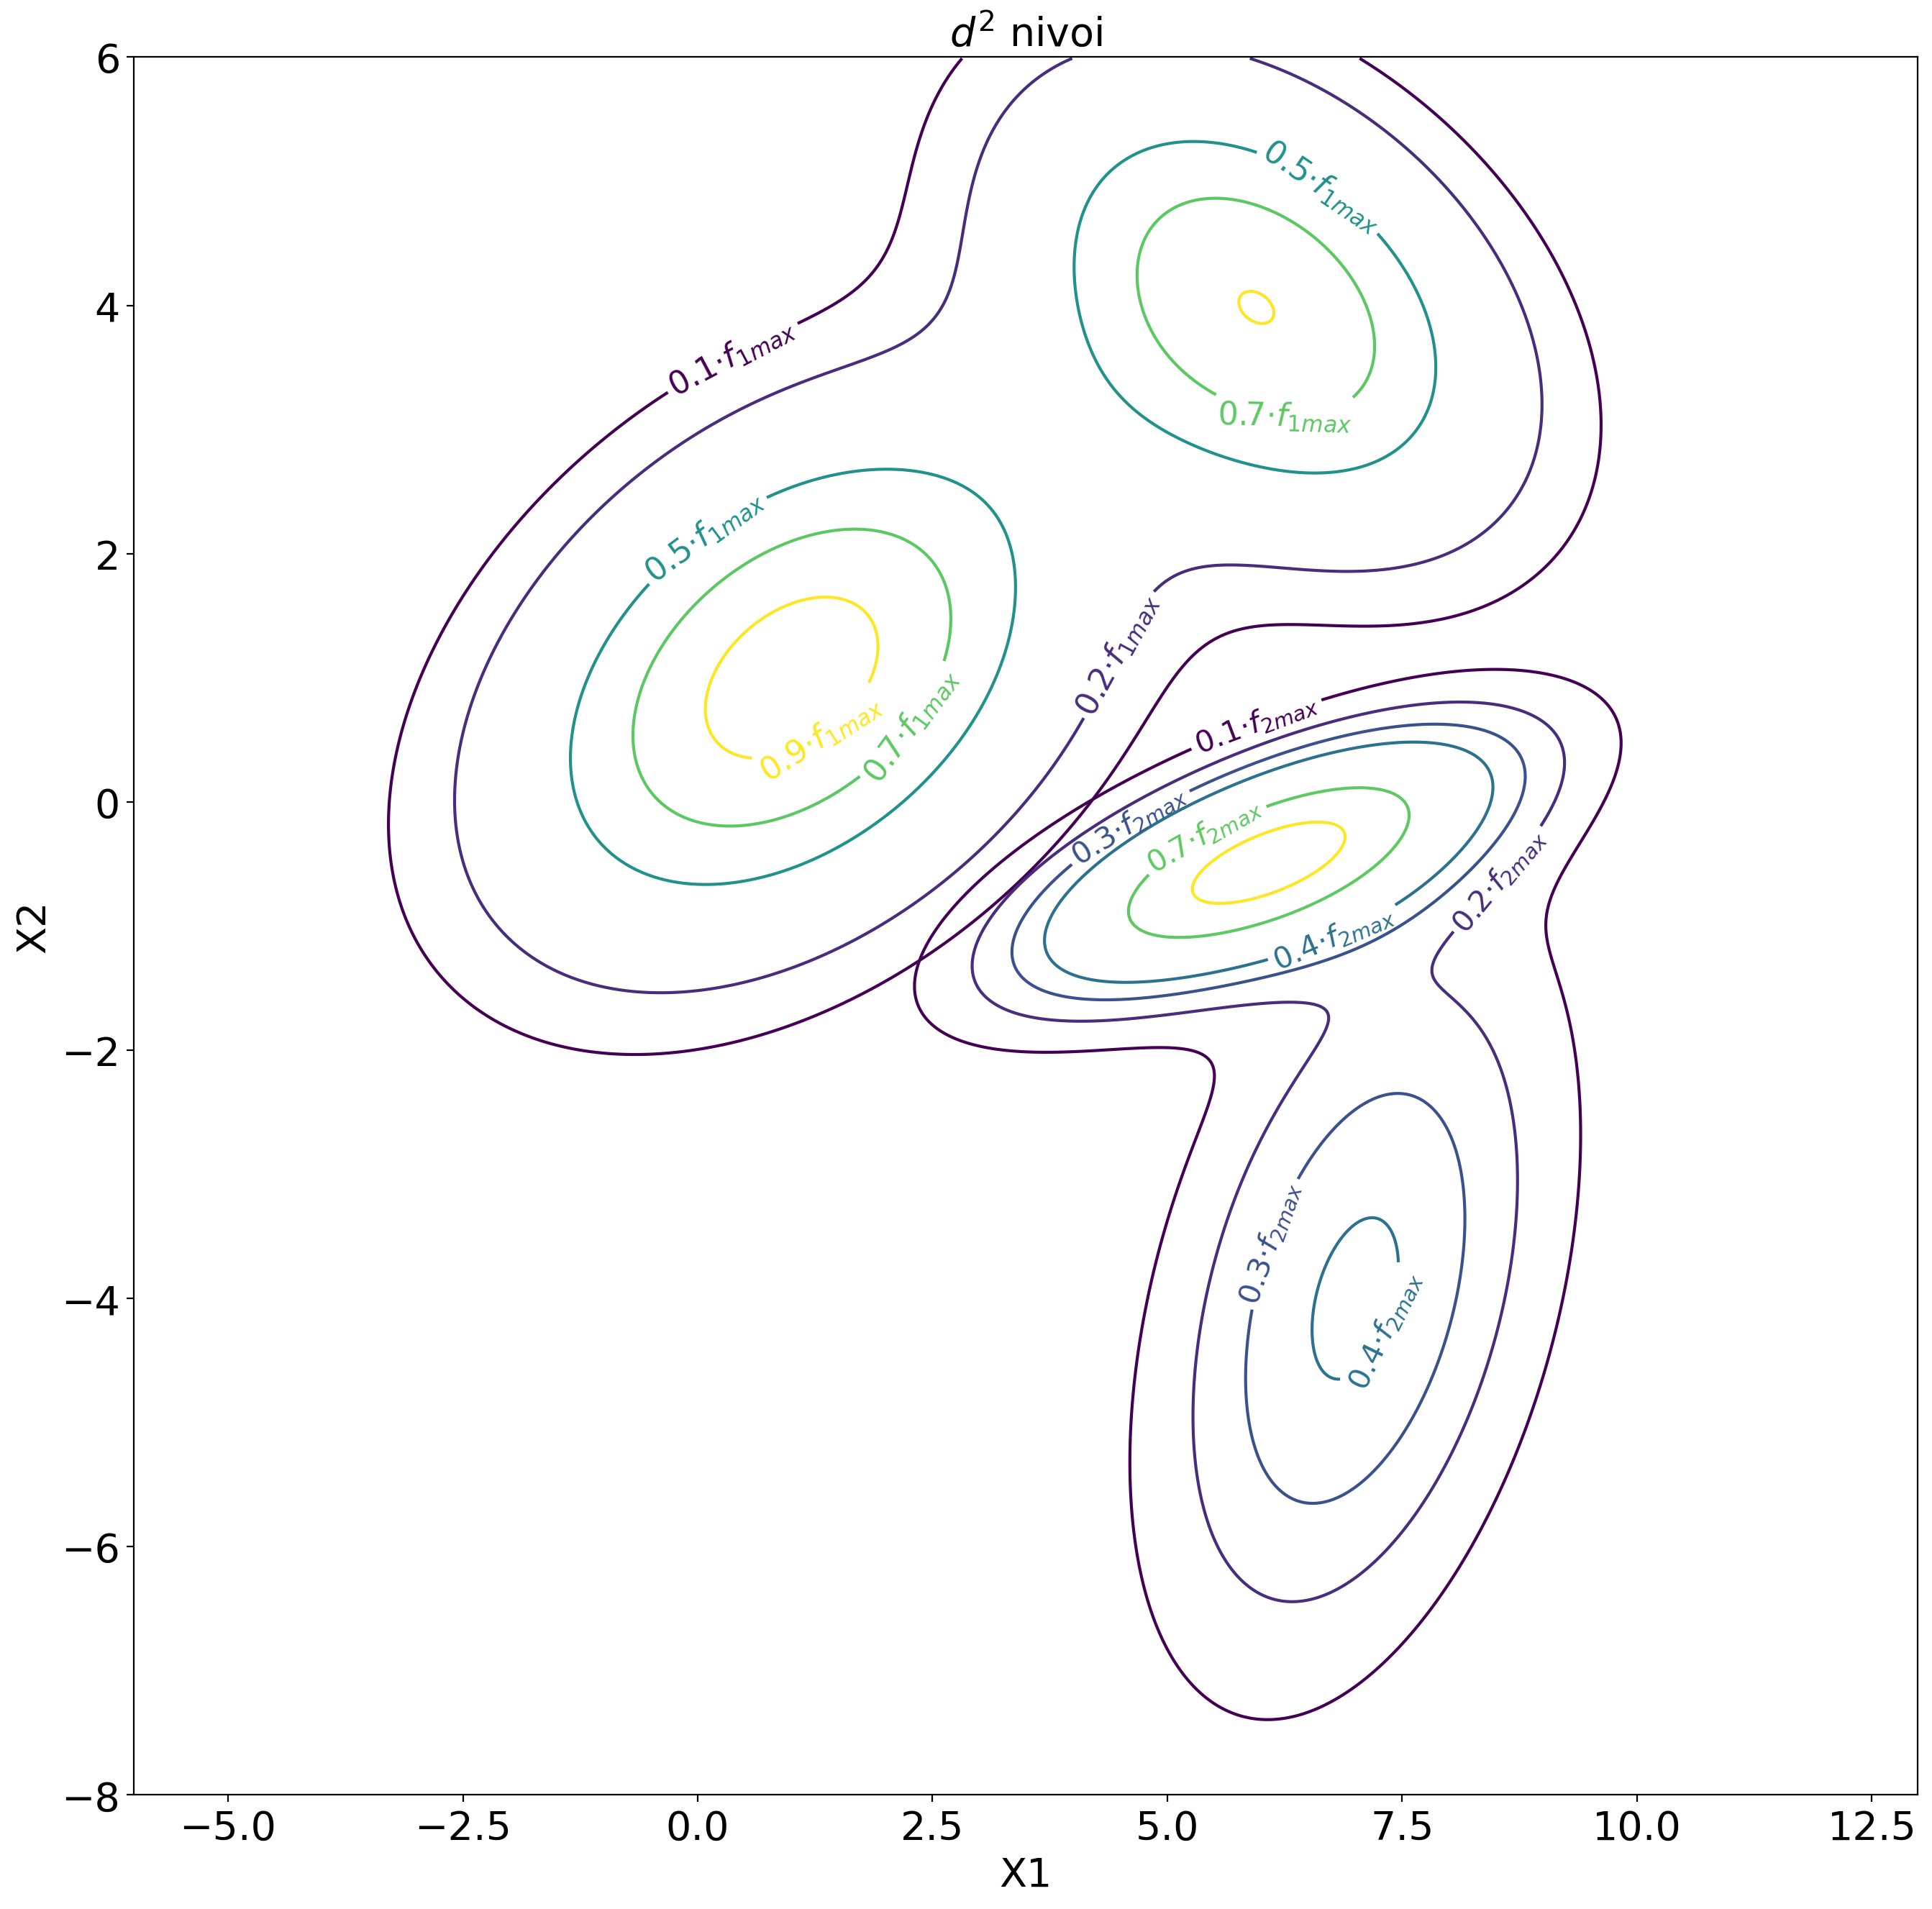

In [12]:
fig1, ax = plt.subplots(figsize = (16,16))
procenti1 = np.array([0.1,0.2,0.5,0.7,0.9]);
procenti2 = np.array([0.1,0.2,0.3,0.4,0.7,0.9]);
levels1 = procenti1 * np.max(pdf_flat)
levels2 = procenti2 * np.max(pdf2_flat)
ax.set_ylim(-8,6)

c1 = ax.contour(mesh[0],mesh[1],pdf,levels1)
c2 = ax.contour(mesh[0],mesh[1],pdf2,levels2)

strings = [x +'$\cdot f_{1max}$'for x in procenti1.astype(str).tolist()];
fmt = {}
for l,s in zip( c1.levels, strings ):
    fmt[l] = s

ax.clabel(c1,inline = 1,fontsize = 16,fmt = fmt)

strings = [x +'$\cdot f_{2max}$'for x in procenti2.astype(str).tolist()];

fmt = {}
for l,s in zip( c2.levels, strings ):
    fmt[l] = s


ax.clabel(c2,inline = 1,fmt = fmt,fontsize = 15)
ax.set(title = '$d^{2}$ nivoi',xlabel = 'X1',ylabel = 'X2')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show(); 

In [61]:
fmt


{0.007965789863840772: '0.1$\\cdot f_{2max}$',
 0.015931579727681545: '0.2$\\cdot f_{2max}$',
 0.023897369591522315: '0.3$\\cdot f_{2max}$',
 0.03186315945536309: '0.4$\\cdot f_{2max}$',
 0.0557605290468854: '0.7$\\cdot f_{2max}$',
 0.07169210877456696: '0.9$\\cdot f_{2max}$'}

# Bayesov klasifikator minimalne verovatnoce greske

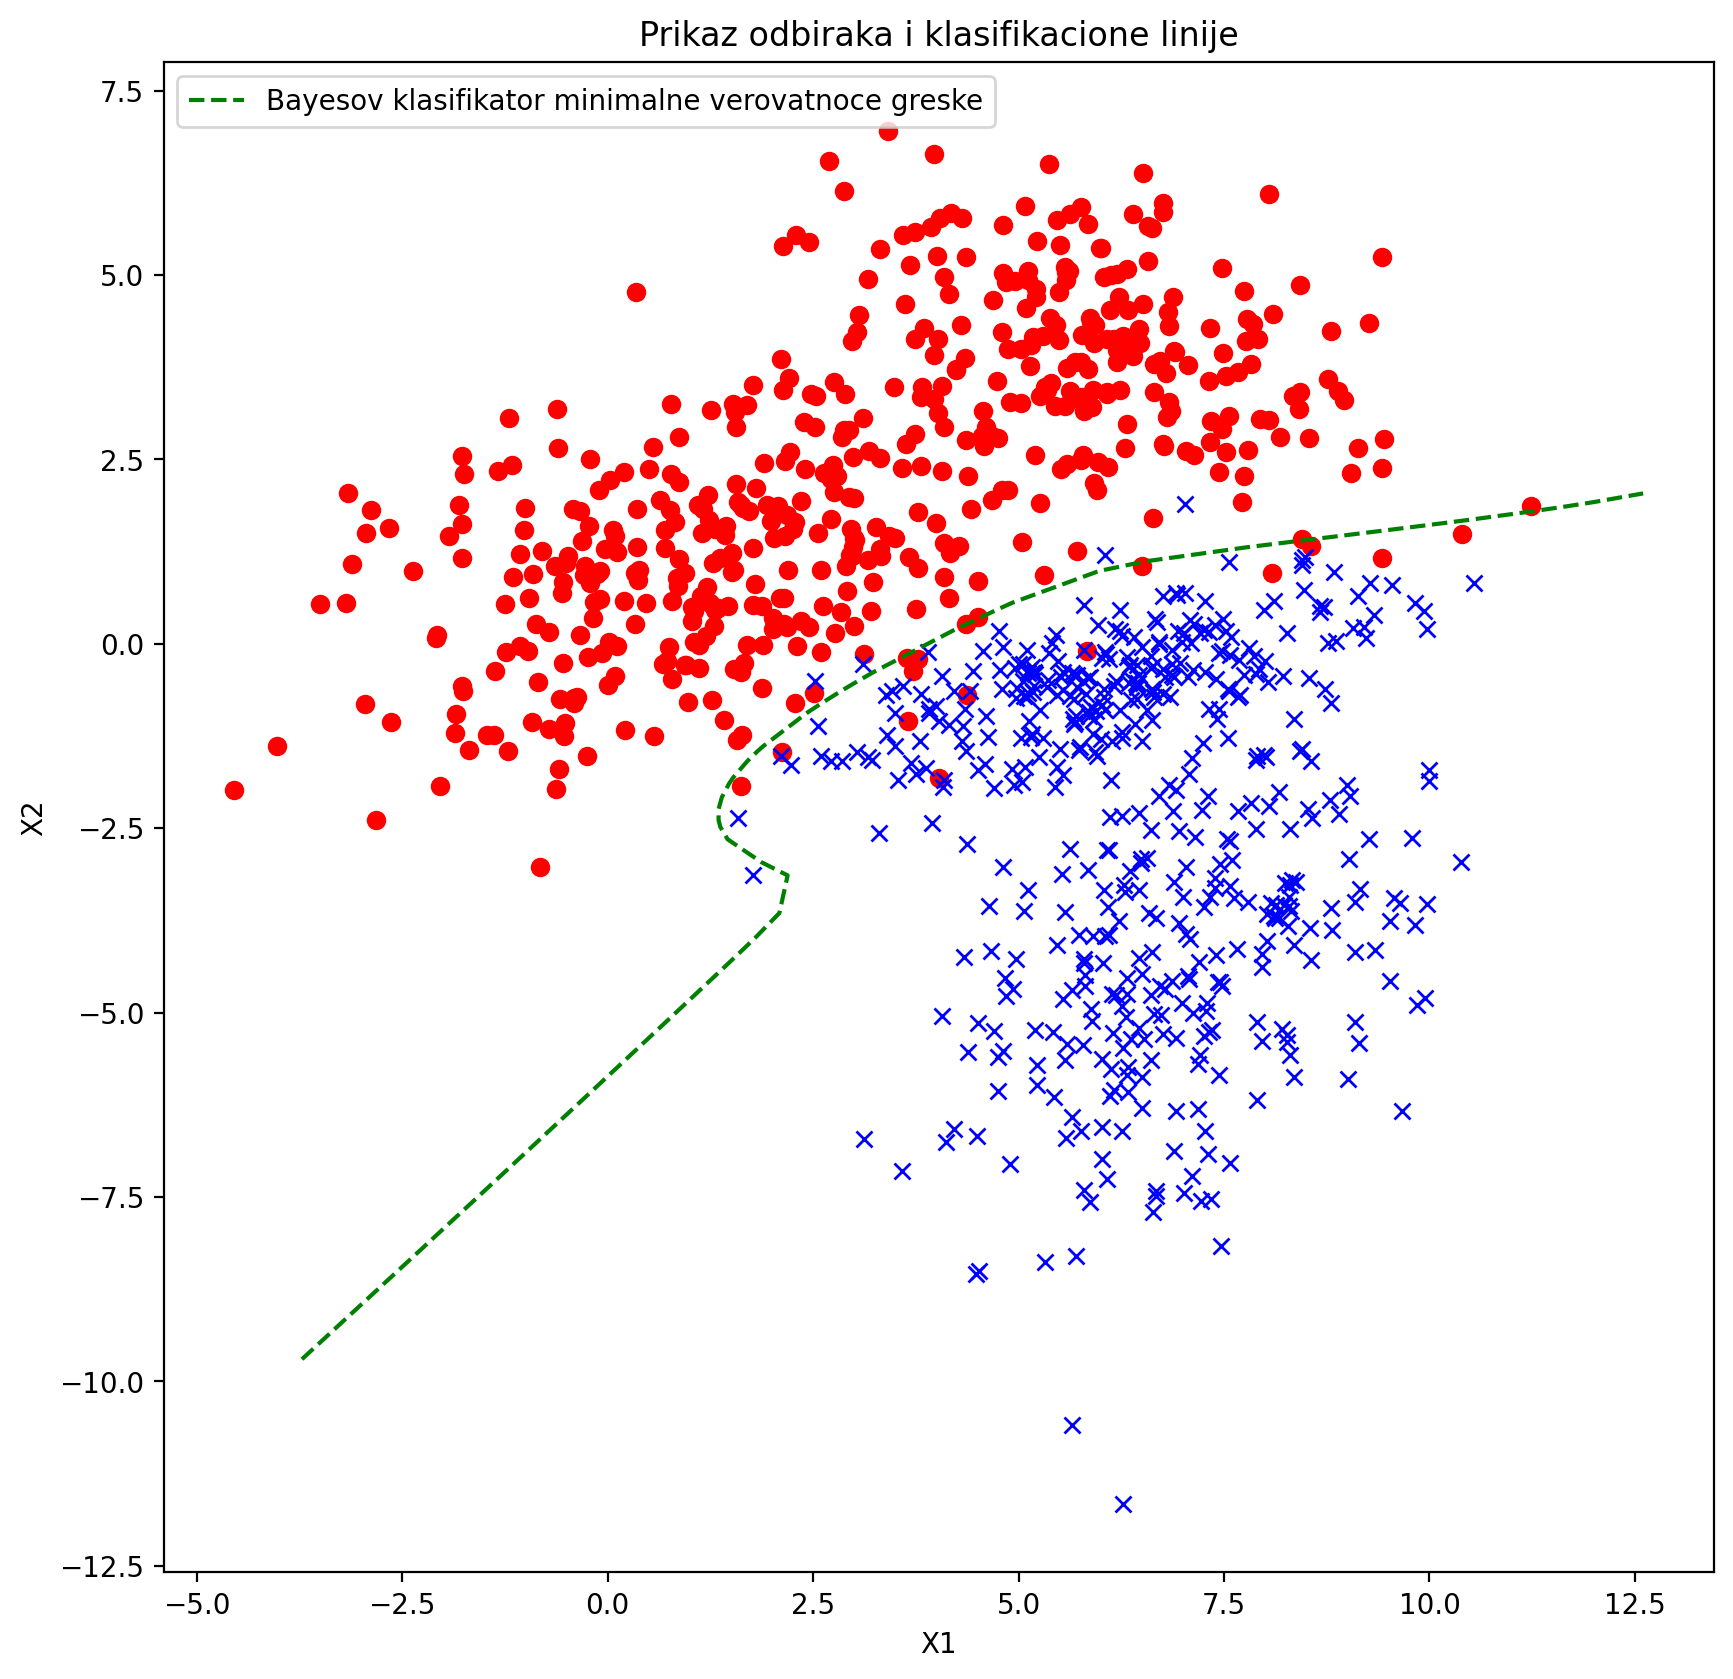

In [14]:
h = np.round(-np.log(pdf_flat/pdf2_flat),3)
np.shape(X)

Bayes_granica = X.T[:,h == 0]

np.shape(Bayes_granica)

fig2,ax = plt.subplots(figsize=  (10,10))
ax.set(title = 'Prikaz odbiraka i klasifikacione linije',xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro')
ax.plot(K2[0,:],K2[1,:],'bx')
ax.plot(Bayes_granica[0,:],Bayes_granica[1,:],'g',linestyle = '--',label = 'Bayesov klasifikator minimalne verovatnoce greske')
ax.legend(loc = 'upper left')
plt.show()

In [15]:
# Izracunavanje verovatnoce greske
Eps1 = np.sum((delta**2)*pdf_flat[h > 0])
Eps2 = np.sum((delta**2)*pdf2_flat[h < 0])

Eps1,Eps2

(0.018269135549439097, 0.011091459881266684)

# Neyman pearsonov test

In [16]:
Eps2_zadato1 = np.array(0.007)
Eps2_zadato2 = np.array(0.015)


mi = np.arange(0.001,5,0.001)
Eps2 = np.zeros((np.size(mi),1))


In [17]:
for i in range(len(mi)):
    Eps2[i] = np.sum((delta**2)*pdf2_flat[h < -np.log(mi[i])])
    if np.round(Eps2[i],3) == Eps2_zadato1:
        mi1 = mi[i]
    if np.round(Eps2[i],3) == Eps2_zadato2:
        mi2 = mi[i]

    

<ipython-input-21-5f212f3f179d>:6: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(1e-2,0)


(2.112, 0.685)

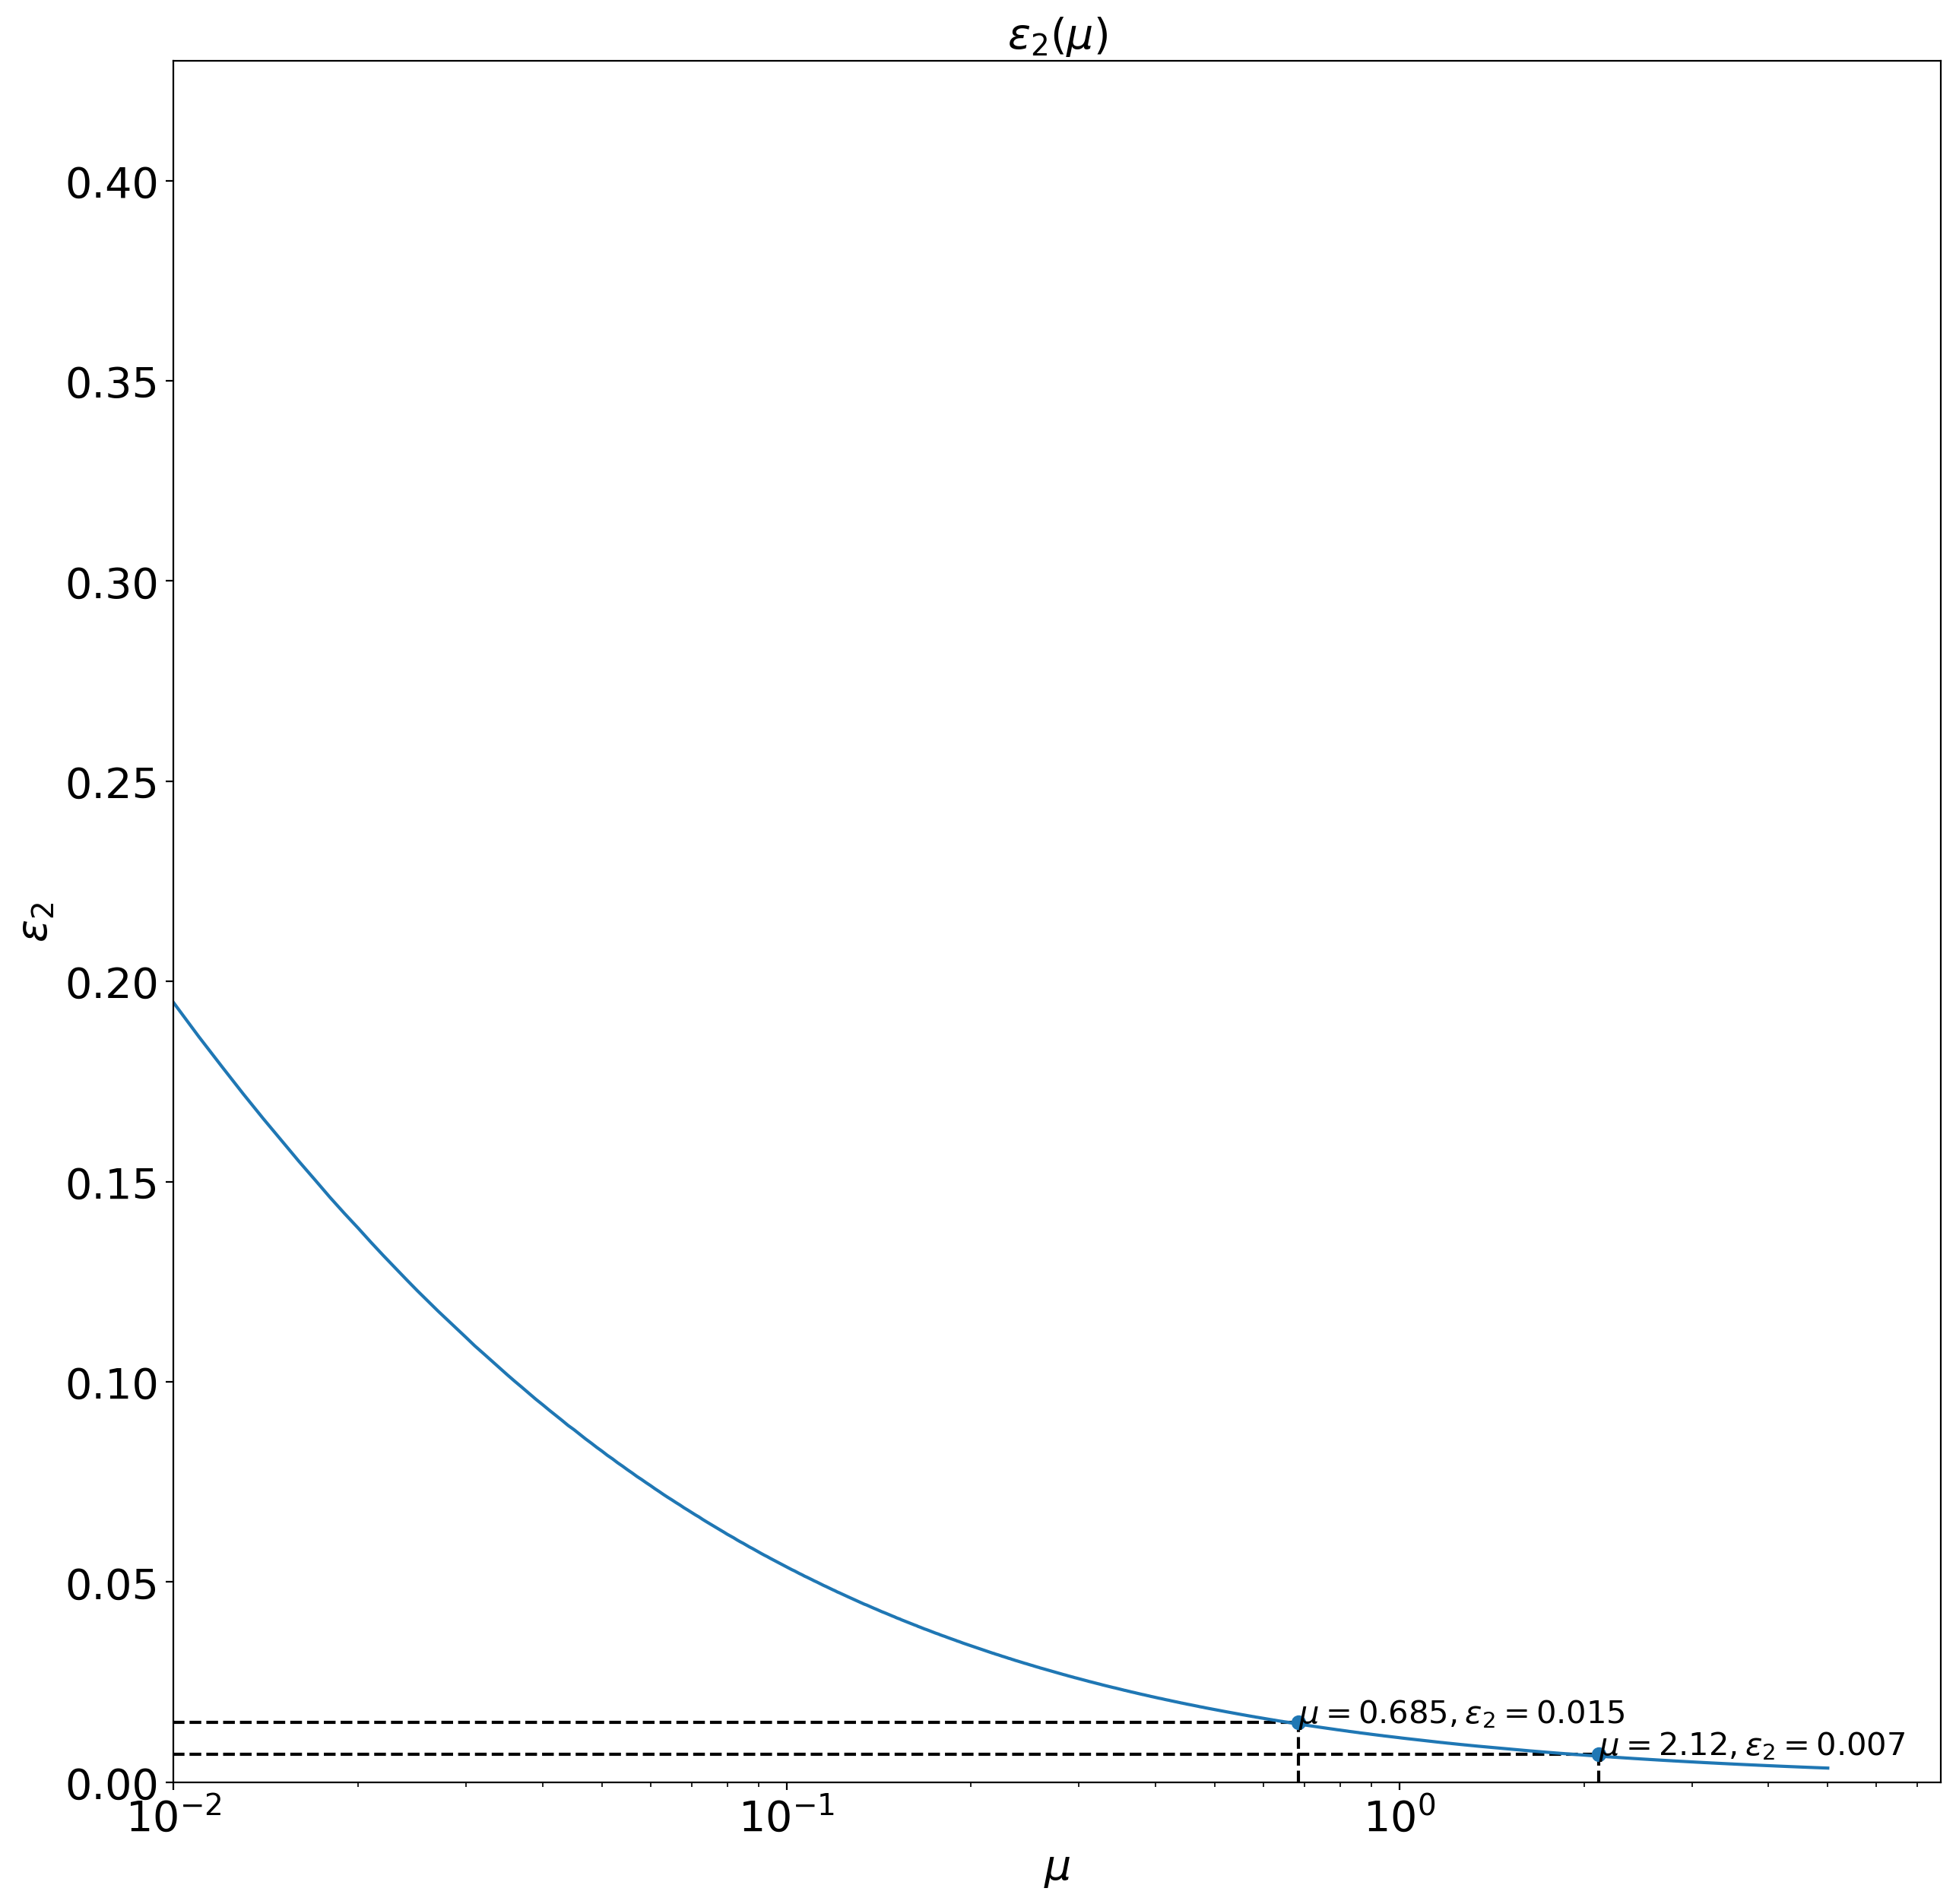

In [21]:
fig,ax = plt.subplots(figsize = (15,15))
np.shape(mi)
plt.xscale('log')
ax.plot(mi,Eps2)
ax.set_ylim(0,0.43)
ax.set_xlim(1e-2,0)


mi_osa = [mi1,mi2]
Eps2_osa = [Eps2_zadato1,Eps2_zadato2]

ax.vlines(mi_osa, 0, Eps2_osa, linestyle="dashed")
ax.hlines(Eps2_osa, 0, mi_osa, linestyle="dashed")


ax.set_xlabel('$\mu$',fontsize = 20)
ax.set_ylabel('$\epsilon_{2}$',fontsize = 20)
ax.set_title('$\epsilon_{2} (\mu)$',fontsize = 25)
ax.scatter(mi_osa, Eps2_osa, zorder=2)
ax.annotate('$\mu = 2.12 , \epsilon_{2} = 0.007 $',(mi1,Eps2_zadato1),fontsize = 15)
ax.annotate('$\mu = 0.685 , \epsilon_{2} = 0.015 $',(mi2,Eps2_zadato2),fontsize = 15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

mi1,mi2

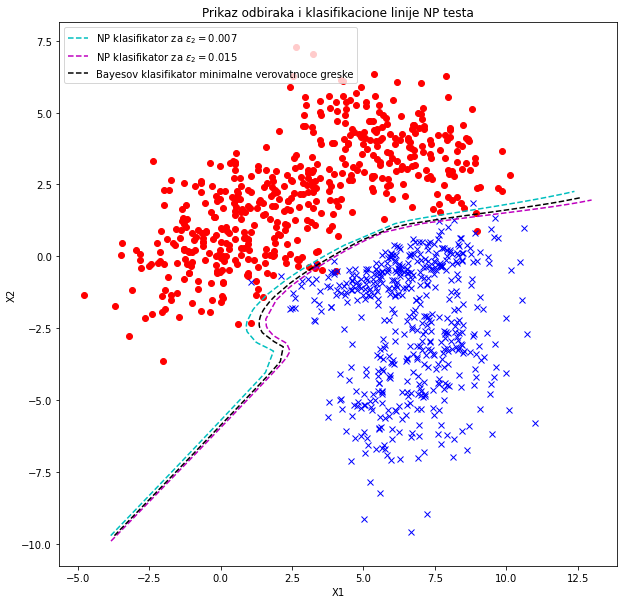

In [229]:
NP_granica1 = X.T[:,h == round(-np.log(mi1),3)]
NP_granica2 = X.T[:,h == round(-np.log(mi2),3)]
NP_granica3 = X.T[:,h == round(-np.log(mi3),3)]
fig2,ax = plt.subplots(figsize=  (10,10))
ax.set(title = 'Prikaz odbiraka i klasifikacione linije NP testa',xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro')
ax.plot(K2[0,:],K2[1,:],'bx')
ax.plot(NP_granica1[0,:],NP_granica1[1,:],'c',linestyle = '--',label = 'NP klasifikator za $\epsilon_{2} = 0.007$')
ax.plot(NP_granica2[0,:],NP_granica2[1,:],'m',linestyle = '--',label = 'NP klasifikator za $\epsilon_{2} = 0.015$')

ax.plot(Bayes_granica[0,:],Bayes_granica[1,:],'k',linestyle = '--',label = 'Bayesov klasifikator minimalne verovatnoce greske')
ax.legend(loc = 'upper left')
plt.show()

## Waldov sekvencijalni test 

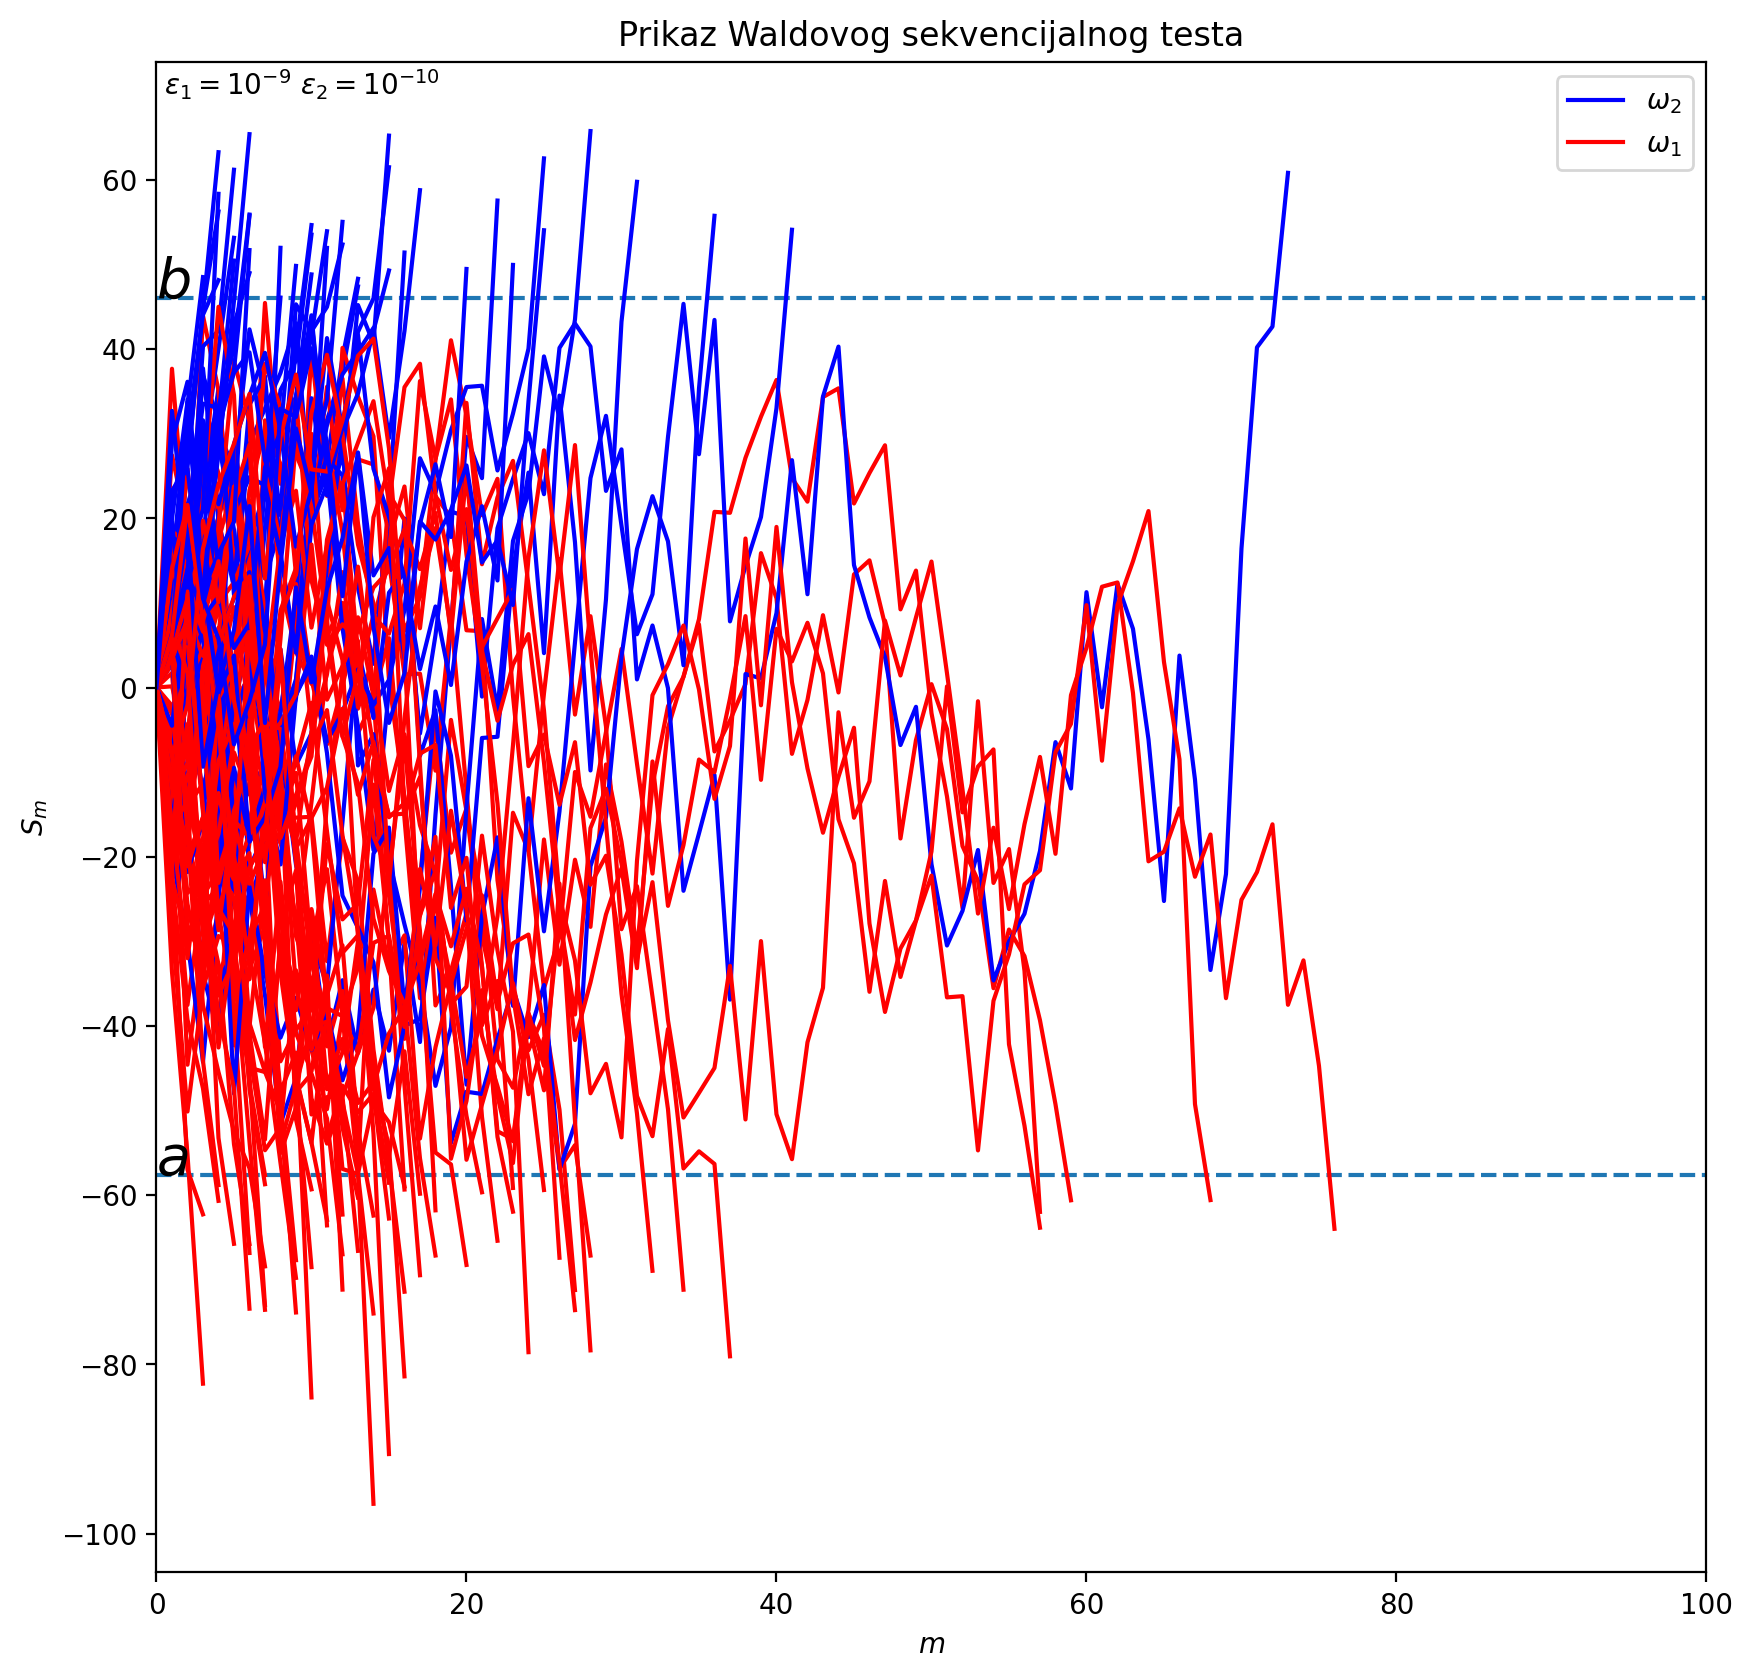

In [81]:
#Ilustracija Waldovog testa

Odbirci = np.concatenate((K1,K2),axis = 1)

Odbirci = Odbirci[:,np.random.permutation(np.shape(Odbirci)[1])]

Eps1Wald = 1e-20;
Eps2Wald = 1e-25;

a = -np.log((1-Eps1Wald)/Eps2Wald)
b = -np.log(Eps1Wald/(1-Eps2Wald))




fig,ax = plt.subplots(figsize = (10,10),sharex = True)
ax.set(xlabel = '$m$',ylabel = '$S_{m}$')
ax.axhline(a,linestyle = '--')
ax.axhline(b,linestyle = '--')
ax.set_title('Prikaz Waldovog sekvencijalnog testa')

ax.set_xlim(0,100)


ind = 0
i = 0
ind1 = True
ind2 = True
while i < 100:
    
    Sm = np.array([0])
    while ind == 0:
        uzmi =np.round((np.shape(Odbirci)[1]-1)*np.random.rand()).astype(int)
        f1 = P11 * multivariate_normal.pdf(Odbirci[:,uzmi],M11,cov11)  + (1-P11)*multivariate_normal.pdf(Odbirci[:,uzmi],M12,cov12)
        f2 = P21 * multivariate_normal.pdf(Odbirci[:,uzmi],M21,cov21)  + (1-P21)*multivariate_normal.pdf(Odbirci[:,uzmi],M22,cov22)
        dS = Sm[np.size(Sm) - 1] - np.log(f1/f2)
        
        Sm = np.append(Sm,dS)
        if (dS <= a):
            if (ind1):
                ax.plot(Sm,'r',label = '$\omega_{1}$')
                ind1 = False
            else:
                ax.plot(Sm,'r')
                    
            break
        if (dS >= b):
            if (ind2):
                ax.plot(Sm,'b',label = '$\omega_{2}$')
                ind2 = False
            else:
                ax.plot(Sm,'b')
                    
            break
        
   
    i = i+1

ax.annotate('$a$',(0,a),fontsize = 20)
ax.annotate('$b$',(0,b),fontsize = 20)
ax.annotate('$\epsilon_{1} = 10^{-9}$ $\epsilon_{2} = 10^{-10}$',(0.5,70))
ax.legend(loc = 'upper right')
plt.show()
        
        
    

In [13]:
f1 = P11 * multivariate_normal.pdf(K1.T,M11,cov11)  + (1-P11)*multivariate_normal.pdf(K1.T,M12,cov12)
f2 = P21 * multivariate_normal.pdf(K1.T,M21,cov21)  + (1-P21)*multivariate_normal.pdf(K1.T,M22,cov22)
hk1 = - np.log(f1/f2)
f1 = P11 * multivariate_normal.pdf(K2.T,M11,cov11)  + (1-P11)*multivariate_normal.pdf(K2.T,M12,cov12)
f2 = P21 * multivariate_normal.pdf(K2.T,M21,cov21)  + (1-P21)*multivariate_normal.pdf(K2.T,M22,cov22)
hk2 = - np.log(f1/f2)

In [30]:
mi1 = hk1.mean()

Eps2Wald = 1e-15;
ind = 0

Eps1zaK1 = np.array([])
m1_sr = np.array([])
m1_teor = np.array([])
for Eps1Wald in np.geomspace(1e-15,0.4,300):
    a = -np.log((1-Eps1Wald)/Eps2Wald)
    b = -np.log(Eps1Wald/(1-Eps2Wald))
    i = 0
    m1 = np.array([])
    while i < 50:
    
        
        k=1
        Sm = 0
        
        while ind == 0:
            
            uzmi =np.round((np.shape(K1)[1]-1)*np.random.rand()).astype(int)
            f1 = P11 * multivariate_normal.pdf(K1[:,uzmi],M11,cov11)  + (1-P11)*multivariate_normal.pdf(K1[:,uzmi],M12,cov12)
            f2 = P21 * multivariate_normal.pdf(K1[:,uzmi],M21,cov21)  + (1-P21)*multivariate_normal.pdf(K1[:,uzmi],M22,cov22)
            Sm = Sm - np.log(f1/f2)
        
            
            if (Sm <= a):
                m1 = np.append(m1,k-1)
                break
            
            k = k+1
       
        i = i+1
    
    m1_sr = np.append(m1_sr,m1.mean())
    Eps1zaK1 = np.append(Eps1zaK1,Eps1Wald)
    m1_teor = np.append(m1_teor,(a * (1 - Eps1Wald) + b * Eps1Wald)/mi1)
        
   




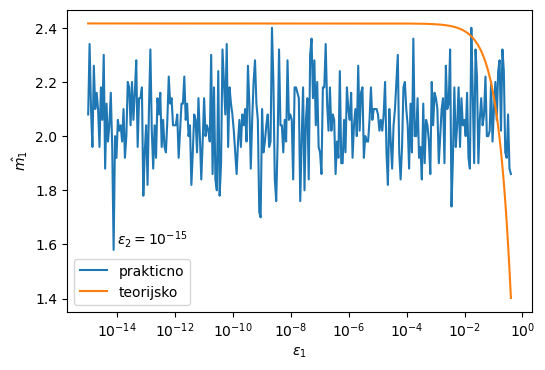

In [31]:

fig,ax = plt.subplots()
#Zavisnost potrebnih odbiraka iz prve klase da se sekvencijalni test zavrsi od verovatnoce greske prvog tipa
plt.xscale('log')
ax.plot(Eps1zaK1,m1_sr,label = 'prakticno')
ax.plot(Eps1zaK1,m1_teor,label = 'teorijsko')
ax.set(xlabel = '$\epsilon_{1}$',ylabel = '$\^{m_{1}}$')
ax.annotate('$\epsilon_{2} = 10^{-15}$',(1e-14,1.6))
ax.legend(loc = 'lower left')

np.size(m1_sr)
plt.show()


In [33]:
Eps1Wald = 1e-15;
ind = 0

Eps2zaK1 = np.array([])
m1_sr = np.array([])
m1_teor = np.array([])
for Eps2Wald in np.geomspace(1e-15,0.4,300):
    a = -np.log((1-Eps1Wald)/Eps2Wald)
    b = -np.log(Eps1Wald/(1-Eps2Wald))
    i = 0
    m1 = np.array([])
    while i < 50:
    
        
        k=1
        Sm = 0
        
        while ind == 0:
            
            uzmi =np.round((np.shape(K1)[1]-1)*np.random.rand()).astype(int)
            f1 = P11 * multivariate_normal.pdf(K1[:,uzmi],M11,cov11)  + (1-P11)*multivariate_normal.pdf(K1[:,uzmi],M12,cov12)
            f2 = P21 * multivariate_normal.pdf(K1[:,uzmi],M21,cov21)  + (1-P21)*multivariate_normal.pdf(K1[:,uzmi],M22,cov22)
            Sm = Sm - np.log(f1/f2)
        
            
            if (Sm <= a):
                m1 = np.append(m1,k-1)
                break
            k = k+1
       
        i = i+1
   
    m1_sr = np.append(m1_sr,m1.mean())
    Eps2zaK1 = np.append(Eps2zaK1,Eps2Wald)
    m1_teor = np.append(m1_teor, (a *(1 - Eps1Wald) + b * Eps1Wald)/mi1)
        

300

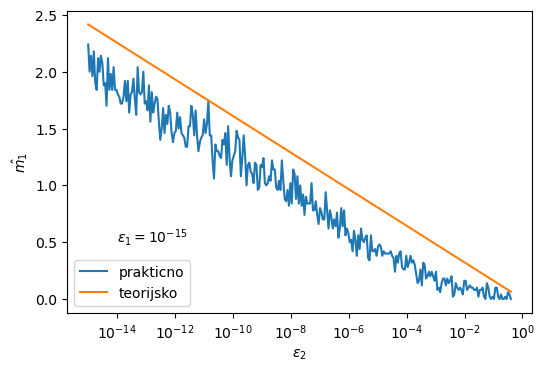

In [35]:

fig,ax =plt.subplots()
plt.xscale('log')

ax.plot(Eps2zaK1,m1_sr,label = 'prakticno')
ax.plot(Eps2zaK1,m1_teor,label = 'teorijsko')
ax.set(xlabel = '$\epsilon_{2}$',ylabel = '$\^{m_{1}}$')
ax.annotate('$\epsilon_{1} = 10^{-15}$',(1e-14,0.5))
ax.legend(loc = 'lower left')
np.size(m1_sr)



In [36]:
mi2 = hk2.mean()
Odbirci = np.concatenate((K1,K2),axis = 1)

Odbirci = Odbirci[:,np.random.permutation(np.shape(Odbirci)[1])]



Eps1Wald = 1e-15;
ind = 0

Eps2zaK2 = np.array([])
m2_sr = np.array([])
m2_teor = np.array([])
for Eps2Wald in np.geomspace(1e-15,0.4,300):
    a = -np.log((1-Eps1Wald)/Eps2Wald)
    b = -np.log(Eps1Wald/(1-Eps2Wald))
    i = 0
    m2 = np.array([])
    while i < 50:
    
        
        k=1
        Sm = 0
        
        while ind == 0:
            
            uzmi =np.round((np.shape(K2)[1]-1)*np.random.rand()).astype(int)
            f1 = P11 * multivariate_normal.pdf(K2[:,uzmi],M11,cov11)  + (1-P11)*multivariate_normal.pdf(K2[:,uzmi],M12,cov12)
            f2 = P21 * multivariate_normal.pdf(K2[:,uzmi],M21,cov21)  + (1-P21)*multivariate_normal.pdf(K2[:,uzmi],M22,cov22)
            Sm = Sm - np.log(f1/f2)
        
            
            if (Sm >= b):
                m2 = np.append(m2,k-1)
                break
            
            k = k+1
       
        i = i+1
    
    m2_sr = np.append(m2_sr,m2.mean())
    Eps2zaK2 = np.append(Eps2zaK2,Eps2Wald)
    m2_teor = np.append(m2_teor,(b * (1 - Eps2Wald) + a * Eps2Wald)/mi2)
        
   

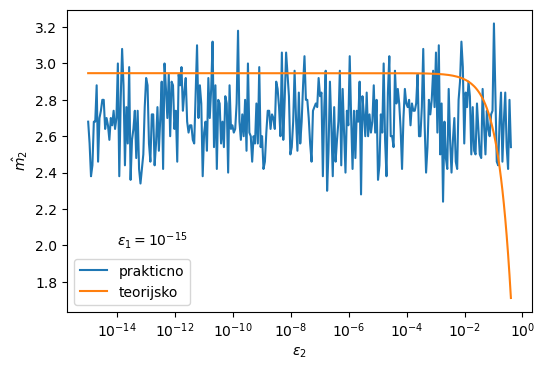

In [38]:
fig,ax =plt.subplots()

plt.xscale('log')
ax.plot(Eps2zaK2,m2_sr,label = 'prakticno')
ax.plot(Eps2zaK2,m2_teor,label = 'teorijsko')
ax.set(xlabel = '$\epsilon_{2}$',ylabel = '$\^{m_{2}}$')
ax.annotate('$\epsilon_{1} = 10^{-15}$',(1e-14,2.0))
ax.legend(loc = 'lower left')




In [39]:
Eps2Wald = 1e-15;
ind = 0

Eps1zaK2 = np.array([])
m2_sr = np.array([])
m2_teor = np.array([])
for Eps1Wald in np.geomspace(1e-15,0.4,300):
    a = -np.log((1-Eps1Wald)/Eps2Wald)
    b = -np.log(Eps1Wald/(1-Eps2Wald))
    i = 0
    m2 = np.array([])
    while i < 50:
    
        
        k=0
        Sm = 0
        
        while ind == 0:
            k = k+1
            uzmi =np.round((np.shape(K2)[1]-1)*np.random.rand()).astype(int)
            f1 = P11 * multivariate_normal.pdf(K2[:,uzmi],M11,cov11)  + (1-P11)*multivariate_normal.pdf(K2[:,uzmi],M12,cov12)
            f2 = P21 * multivariate_normal.pdf(K2[:,uzmi],M21,cov21)  + (1-P21)*multivariate_normal.pdf(K2[:,uzmi],M22,cov22)
            Sm = Sm - np.log(f1/f2)
        
            
            if (Sm >= b):
                
                m2 = np.append(m2,k-1)
                break
        
       
        i = i+1
   
    m2_sr = np.append(m2_sr,m2.mean())
    Eps1zaK2 = np.append(Eps1zaK2,Eps1Wald)
    m2_teor = np.append(m2_teor, (b * (1 - Eps2Wald) + a * Eps2Wald)/mi2)

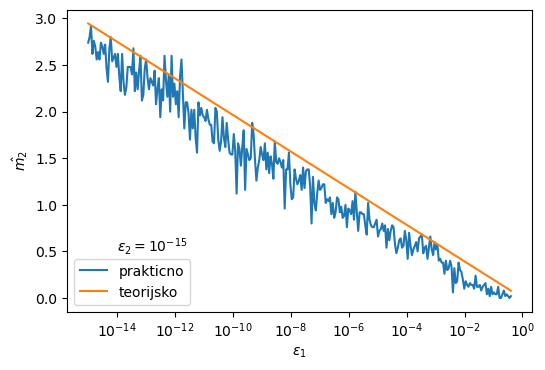

In [40]:
fig,ax =plt.subplots()

plt.xscale('log')
ax.plot(Eps1zaK2,m2_sr,label = 'prakticno')
ax.plot(Eps1zaK2,m2_teor,label = 'teorijsko')
ax.set(xlabel = '$\epsilon_{1}$',ylabel = '$\^{m_{2}}$')
ax.annotate('$\epsilon_{2} = 10^{-15}$',(1e-14,0.5))
ax.legend(loc = 'lower left')
